# Exploratory Data Analysis

## Import The Libraries

In [1]:
# Basic Package
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
from scipy.stats import skew,kurtosis
from scipy.stats import zscore

## Settings

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

## Importing The Dataset

In [3]:
# file_path = 'weather_forecast_data.csv'
# file_path = 'Student_performance_data.csv'
# file_path = 'loan_data.csv'
file_path ='diabetes.csv'
df = pd.read_csv('datasets/'+file_path)

## Labels of the dataframe

In [4]:
labels = df.columns
print(labels)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Dataframe Head

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Importing The Data

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Basic Information

In [7]:
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)

df.info()

Shape: (768, 9)

Column Names:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data Types:

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5

## Missing Values

Total Missing Values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


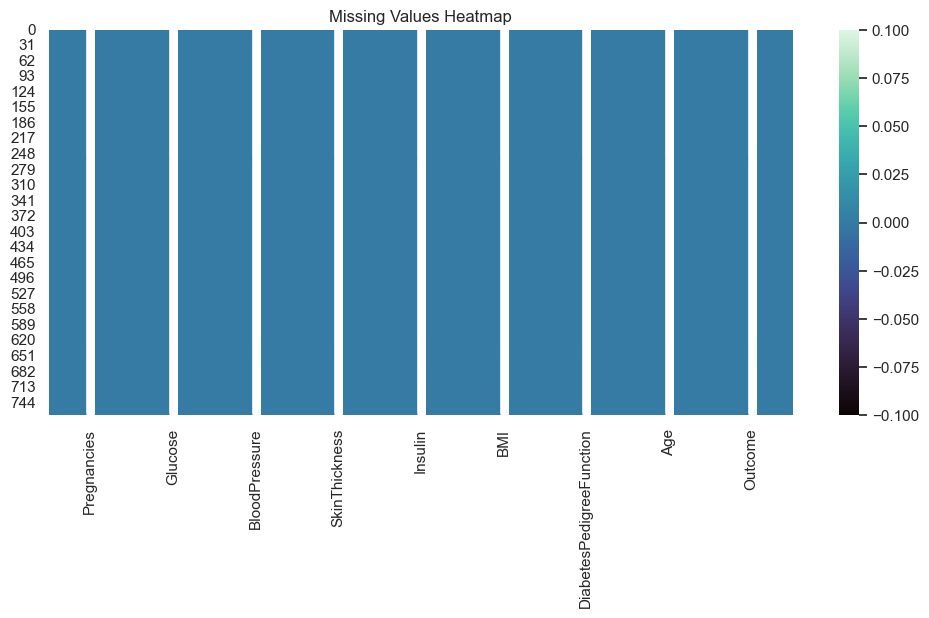

In [9]:
print("Total Missing Values:\n")
print(df.isnull().sum())

# Visualize
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True, cmap="mako", annot=True)
# cmap = ["viridis", "plasma", "inferno", "magma", "cividis", "rocket", "mako", "flare", "crest"]
plt.title("Missing Values Heatmap")
plt.show()

## Duplicate Rows

In [10]:
print("Duplicate Rows:", df.duplicated().sum())
df[df.duplicated()]

Duplicate Rows: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Normalization

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# df_mod = sc.fit_transform(df)


In [ ]:
# print(df_mod)

## Correlation Matrix

In [ ]:
# df_mod = pd.DataFrame(df_mod)
# df_mod.columns

## Assign Columns to a dataframe df_mod

In [ ]:
# df_mod.columns = ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
#        'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
#        'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
#        'GradeClass']

## Dataframe Head df_mod

In [ ]:
# df_mod.head

## Correlation Matrix After Scaling

In [ ]:
# corr = df_mod.corr(numeric_only=True)
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()

## Summary Statistics

In [11]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Numerical vs Categorical Columns

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

print("Numerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)

Numerical Columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Categorical Columns:
 Index([], dtype='object')


## Univariate Analysis

### Numerical Features (Histogram + Boxplots)

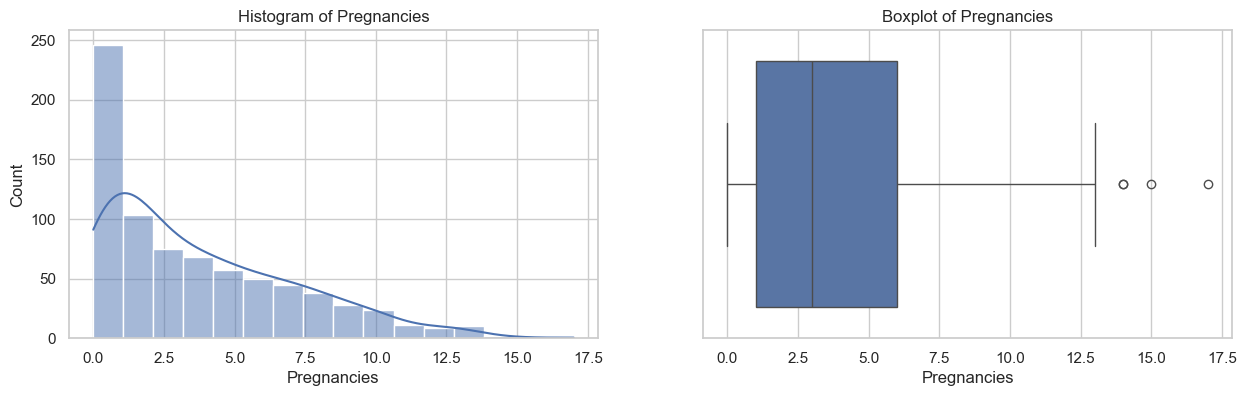

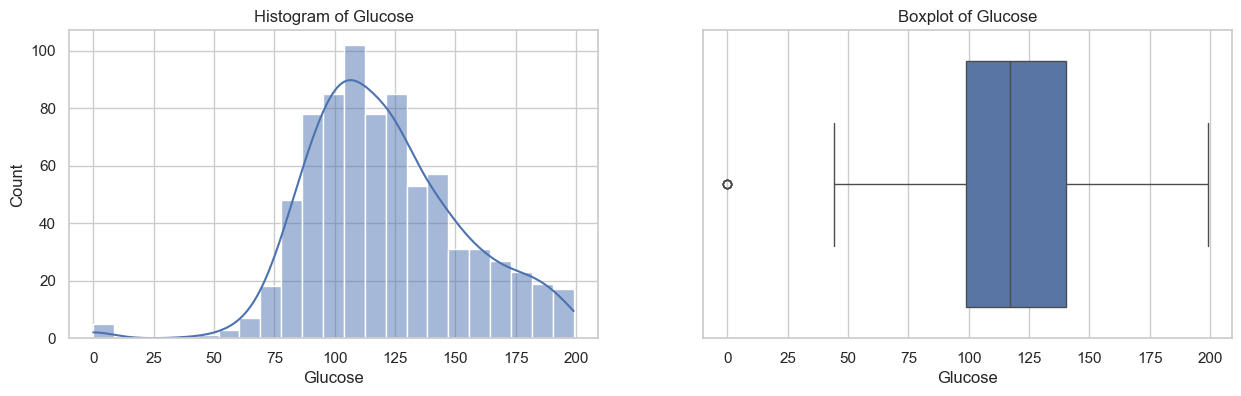

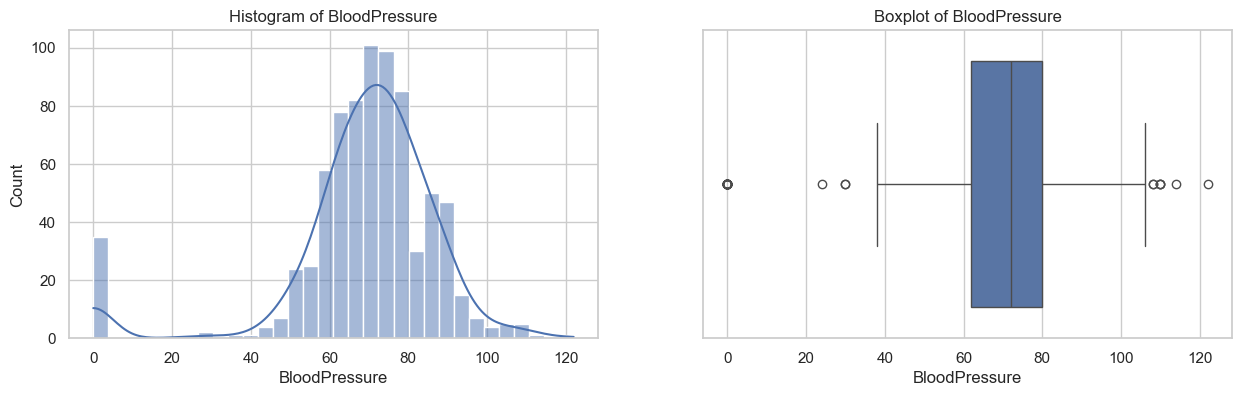

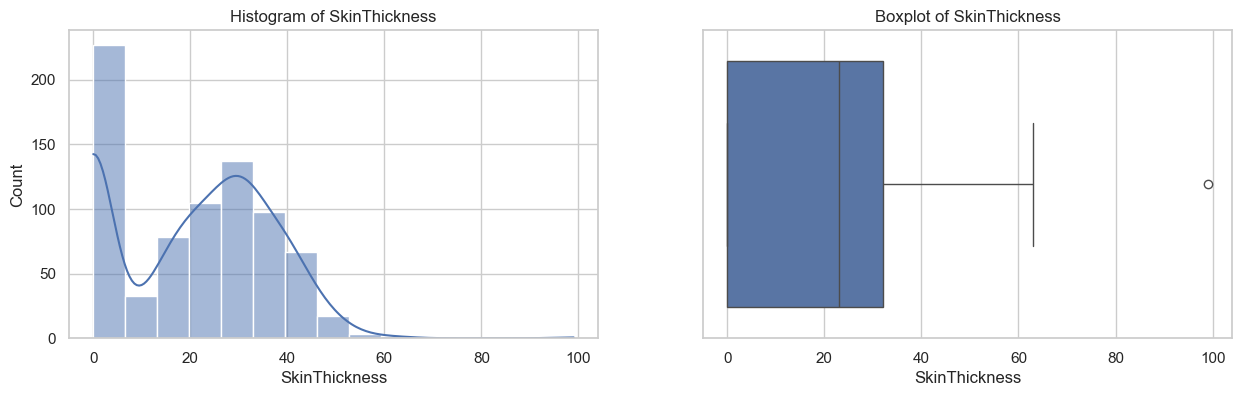

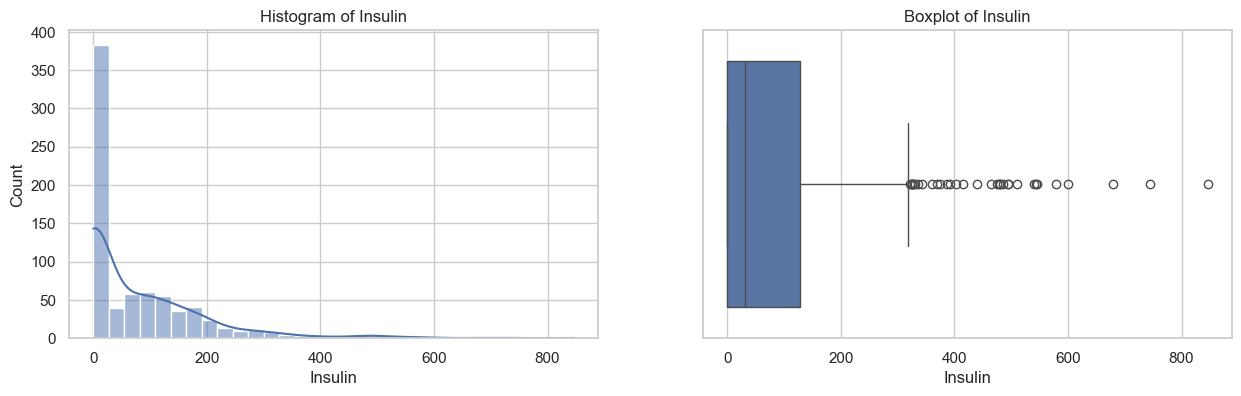

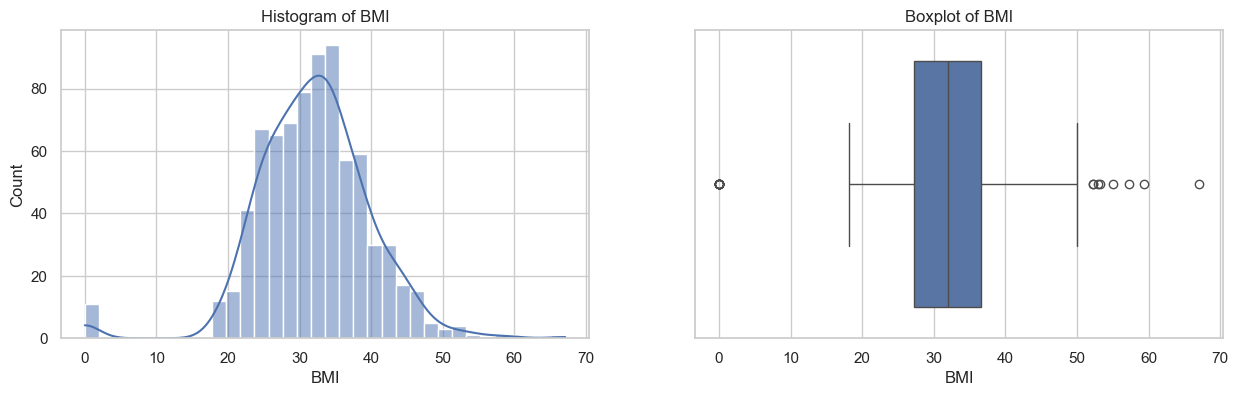

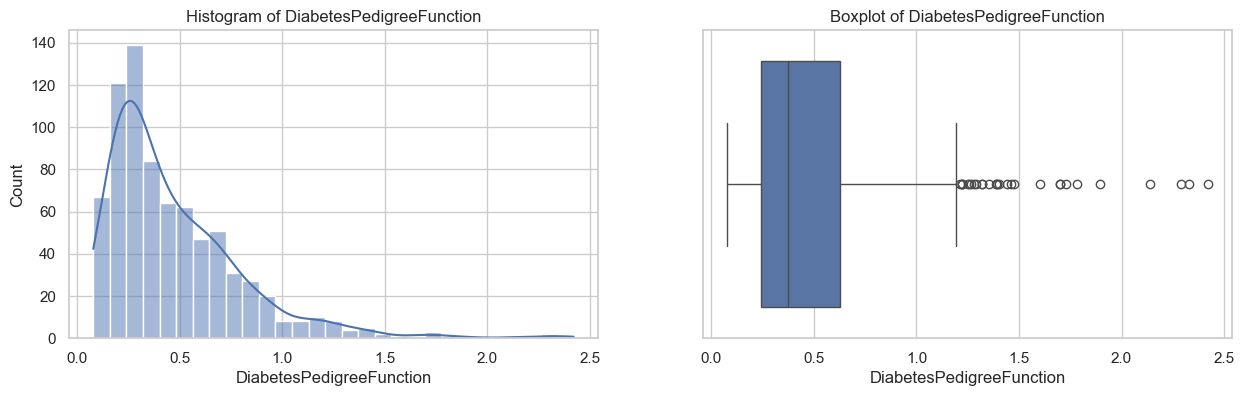

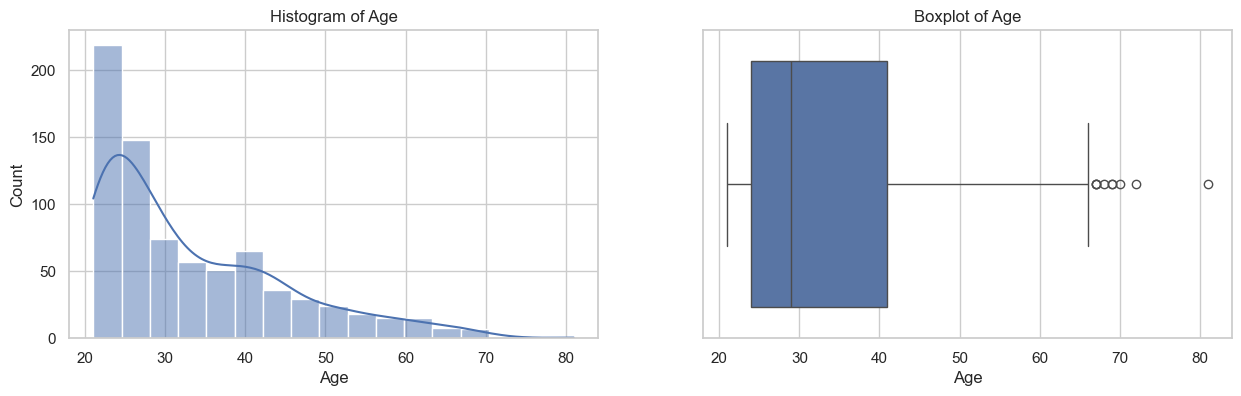

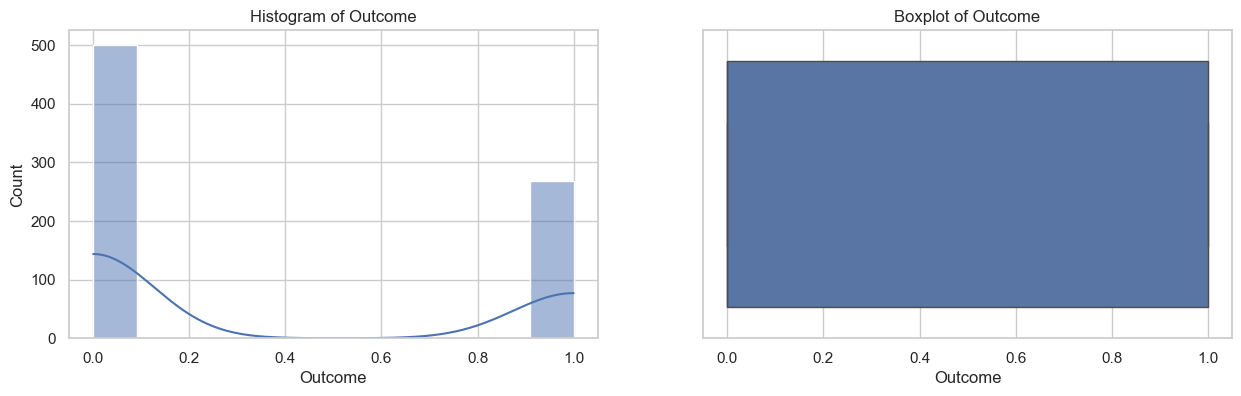

In [13]:
for col in num_cols:
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

### Categorical Features (Countplots)

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()

## Outlier Detection (Z-score or IQR)

In [ ]:
outlier_cols = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    if len(outliers) > 0:
        outlier_cols.append(col)

print("Columns with outliers:", outlier_cols)

## Bivariate Analysis

### Numerical vs Numerical (Scatterplots)

In [ ]:
for col in num_cols:
    if col != num_cols[0]:  # Avoid self-scatter
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=df[num_cols[0]], y=df[col])
        plt.title(f"{num_cols[0]} vs {col}")
        plt.show()

### Categorical vs Numerical

In [ ]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(10,4))
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

## Correlation Analysis

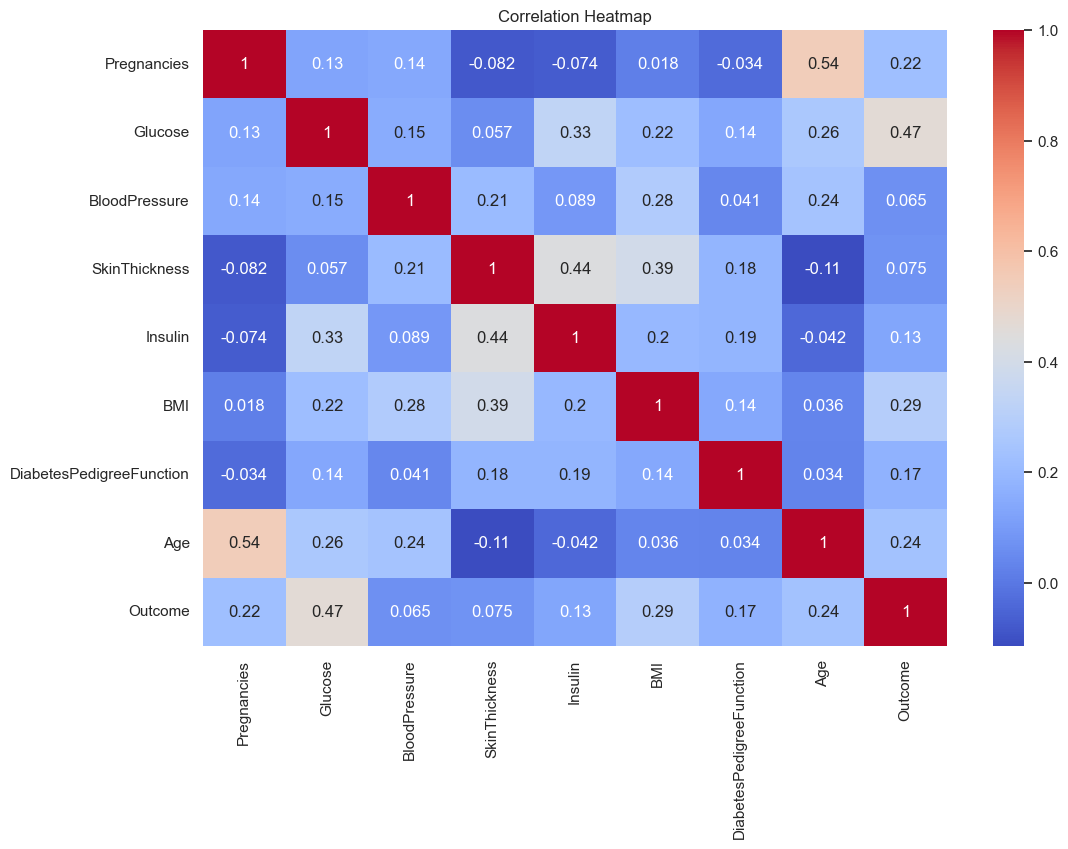

In [28]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Pairplot (Multivariate)

In [ ]:
sns.pairplot(df[num_cols], corner=True)
plt.show()

## Skewness & Kurtosis

In [ ]:
for col in num_cols:
    print(f"{col}: Skewness={skew(df[col].dropna()):.2f}, Kurtosis={kurtosis(df[col].dropna()):.2f}")

## Target Variable Detection (Auto)

In [ ]:
target = df.columns[-1]  # last column as target
print("Detected Target Variable:", target)

# Target distribution
sns.countplot(x=df[target])
plt.title("Target Variable Distribution")
plt.show()

## Taking Care of Missing Values

In [ ]:
df_clean = df.copy()

# Numerical imputation
for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Categorical imputation
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

## Save Cleaned Data

In [ ]:
df_clean.to_csv("cleaned_dataset.csv", index=False)
print("Dataset Saved as cleaned_dataset.csv")